In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.데이터 불러오기

### 1.1 서울 공유 자전거(케글)

#### 1.1.1 데이터 불러오기

In [2]:
df_kaggle = pd.read_csv('../data/SeoulBikeData.csv', encoding='cp949')
df_kaggle

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [31]:
df_kaggle[df_kaggle['Date'] == '01/01/2018']['Rented Bike Count']

4290

#### 1.1.2 결측치 확인하기

In [7]:
df_kaggle.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

#### 1.1.3 컬럼명 확인하기

In [8]:
df_kaggle.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### 1.2 공공자전거 대여건수 데이터(열린데이터)

#### 1.2.1 데이터 불러오기

##### 23.01 ~ 23.06

In [11]:
df_day_rental1 = pd.read_csv('../data/서울특별시 공공자전거 일별 대여건수_23.1-6.csv', encoding='cp949')
df_day_rental1

,대여일시,대여건수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2023-01-01,"38,037",NaN,NaN,NaN,NaN
1,2023-01-02,"56,609",NaN,NaN,NaN,NaN
2,2023-01-03,"61,252",NaN,NaN,NaN,NaN
3,2023-01-04,"67,721",NaN,NaN,NaN,NaN
4,2023-01-05,"68,711",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
175,2023-06-25,"133,566",NaN,NaN,NaN,NaN
176,2023-06-27,"179,792",NaN,NaN,NaN,NaN
177,2023-06-28,"185,929",NaN,NaN,NaN,NaN
178,2023-06-29,"35,326",NaN,NaN,NaN,NaN


##### 22.07 ~ 22.12

In [19]:
df_day_rental2 = pd.read_csv('../data/서울특별시 공공자전거 일별 대여건수_22.07-22.12.csv', encoding='cp949')
df_day_rental2 = df_day_rental2[:184]

In [20]:
df_day_rental2

,대여일시,대여건수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2022-07-01,"157,478",NaN,NaN,NaN,NaN
1,2022-07-02,"131,815",NaN,NaN,NaN,NaN
2,2022-07-03,"114,470",NaN,NaN,NaN,NaN
3,2022-07-04,"151,497",NaN,NaN,NaN,NaN
4,2022-07-05,"149,259",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
179,2022-12-27,"58,890",NaN,NaN,NaN,NaN
180,2022-12-28,"54,012",NaN,NaN,NaN,NaN
181,2022-12-29,"57,393",NaN,NaN,NaN,NaN
182,2022-12-30,"56,058",NaN,NaN,NaN,NaN


##### 22.01 ~ 22.06

In [24]:
df_day_rental3 = pd.read_csv('../data/서울특별시 공공자전거 일별 대여건수_22.01-22.06.csv', encoding='cp949')
df_day_rental3 = df_day_rental3[:181]

In [25]:
df_day_rental3

,대여일시,대여건수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2022-01-01,"29,185",NaN,NaN,NaN,NaN
1,2022-01-02,"28,914",NaN,NaN,NaN,NaN
2,2022-01-03,"53,573",NaN,NaN,NaN,NaN
3,2022-01-04,"56,344",NaN,NaN,NaN,NaN
4,2022-01-05,"57,413",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
176,2022-06-26,"122,474",NaN,NaN,NaN,NaN
177,2022-06-27,"94,761",NaN,NaN,NaN,NaN
178,2022-06-28,"112,003",NaN,NaN,NaN,NaN
179,2022-06-29,"52,664",NaN,NaN,NaN,NaN


### 1.3 공공자전거 대여소 정보 데이터(열린데이터)

#### 1.3.1 데이터 불러오기

In [5]:
df_rental_shop = pd.read_csv('../data/공공자전거 대여소 정보(23.06월 기준).csv', encoding='cp949')
df_rental_shop

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.9714508,2015-10-07,20,20,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,3699.0,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783,2022-06-21,NaN,15,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2749,3700.0,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.1225739,2022-07-08,NaN,8,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2750,3701.0,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.1461334,2022-10-12,NaN,8,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751,4951.0,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.1351624,2022-09-29,NaN,5,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_rental_shop.columns

Index(['대여소\n번호', '보관소(대여소)명', '소재지(위치)', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', '설치\n시기', '설치형태', 'Unnamed: 8', '운영\n방식', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [7]:
df_rental_shop.isnull().sum()

대여소\n번호           4
보관소(대여소)명         4
소재지(위치)           3
Unnamed: 3        3
Unnamed: 4        3
Unnamed: 5        3
설치\n시기            4
설치형태           1436
Unnamed: 8     1169
운영\n방식            4
Unnamed: 10    2753
Unnamed: 11    2753
Unnamed: 12    2753
Unnamed: 13    2753
Unnamed: 14    2753
Unnamed: 15    2753
Unnamed: 16    2753
Unnamed: 17    2753
Unnamed: 18    2753
Unnamed: 19    2753
Unnamed: 20    2753
dtype: int64

In [13]:
#df_rental_shop['Unnamed: 8'].value_counts()
df_rental_shop['설치형태'].value_counts()
df_rental_shop['설치\n시기'].value_counts()

2017-11-01    172
2016-06-29    126
2016-07-06     87
2017-11-28     75
2015-10-07     70
             ... 
2020-09-16      1
2021-09-14      1
2019-01-02      1
2021-05-27      1
2023-01-18      1
Name: 설치\n시기, Length: 494, dtype: int64

In [18]:
df_rental_shop.drop(columns=['Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [20]:
df_rental_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753 entries, 0 to 2752
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여소
번호      2749 non-null   float64
 1   보관소(대여소)명   2749 non-null   object 
 2   소재지(위치)     2750 non-null   object 
 3   Unnamed: 3  2750 non-null   object 
 4   Unnamed: 4  2750 non-null   object 
 5   Unnamed: 5  2750 non-null   object 
 6   설치
시기       2749 non-null   object 
 7   설치형태        1317 non-null   object 
 8   Unnamed: 8  1584 non-null   object 
 9   운영
방식       2749 non-null   object 
dtypes: float64(1), object(9)
memory usage: 215.2+ KB


In [21]:
df_rental_shop.rename(columns={'Unnamed: 3':'상세주소', 'Unnamed: 4':'위도', 
                               'Unnamed: 5':'경도', 'Unnamed: 8':'거치\n대수'}, 
                        inplace=True)

In [22]:
df_rental_shop

,대여소\n번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치\n시기,설치형태,거치\n대수,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.9714508,2015-10-07,20,20,QR
...,...,...,...,...,...,...,...,...,...,...
2748,3699.0,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783,2022-06-21,NaN,15,QR
2749,3700.0,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.1225739,2022-07-08,NaN,8,QR
2750,3701.0,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.1461334,2022-10-12,NaN,8,QR
2751,4951.0,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.1351624,2022-09-29,NaN,5,QR


In [29]:
df_rental_shop['거치\n대수'].isnull().sum()

1169

In [36]:
df_rental_shop['운영\n방식'].isnull().sum()

4

### 1.4 실시간 공공자전거 대여이력

In [2]:
import requests
import json

##### 1.4.1 1~1000번

In [3]:
url1 = "http://openapi.seoul.go.kr:8088/794c4c52666d756e39307969456554/json/bikeList/1/1000/"

response = requests.get(url1)
rental_data = response.content

In [4]:
file_path = "../data/rental_history_data1.json"

rental_data_str = rental_data.decode("utf-8")

with open(file_path, "w", encoding="utf-8") as file:
    file.write(rental_data_str)

##### 1.4.2 1001~2000번

In [5]:
url2 = "http://openapi.seoul.go.kr:8088/794c4c52666d756e39307969456554/json/bikeList/1001/2000/"

response = requests.get(url2)
rental_data = response.content

In [6]:
file_path = "../data/rental_history_data2.json"

rental_data_str = rental_data.decode("utf-8")

with open(file_path, "w", encoding="utf-8") as file:
    file.write(rental_data_str)

##### 1.4.3 2001~3000번

In [7]:
url3 = "http://openapi.seoul.go.kr:8088/794c4c52666d756e39307969456554/json/bikeList/2001/3000/"

response = requests.get(url3)
rental_data = response.content

In [8]:
file_path = "../data/rental_history_data3.json"

rental_data_str = rental_data.decode("utf-8")

with open(file_path, "w", encoding="utf-8") as file:
    file.write(rental_data_str)

#### 1.5 json 파일을 데이터프레임으로 변환

In [12]:
with open("../data/rental_history_data1.json") as file:
    js1 = json.loads(file.read())
df1 = pd.DataFrame(js1)
df1

,rentBikeStatus
RESULT,"{'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다.'}"
list_total_count,1000
row,"[{'rackTotCnt': '15', 'stationName': '102. 망원역..."


In [20]:
df1 = pd.read_json('../data/rental_history_data1.json', encoding='utf8')
df1.to_json(orient='index')

'{"RESULT":{"rentBikeStatus":{"CODE":"INFO-000","MESSAGE":"\\uc815\\uc0c1 \\ucc98\\ub9ac\\ub418\\uc5c8\\uc2b5\\ub2c8\\ub2e4."}},"list_total_count":{"rentBikeStatus":1000},"row":{"rentBikeStatus":[{"rackTotCnt":"15","stationName":"102. \\ub9dd\\uc6d0\\uc5ed 1\\ubc88\\ucd9c\\uad6c \\uc55e","parkingBikeTotCnt":"21","shared":"140","stationLatitude":"37.55564880","stationLongitude":"126.91062927","stationId":"ST-4"},{"rackTotCnt":"14","stationName":"103. \\ub9dd\\uc6d0\\uc5ed 2\\ubc88\\ucd9c\\uad6c \\uc55e","parkingBikeTotCnt":"23","shared":"164","stationLatitude":"37.55495071","stationLongitude":"126.91083527","stationId":"ST-5"},{"rackTotCnt":"13","stationName":"104. \\ud569\\uc815\\uc5ed 1\\ubc88\\ucd9c\\uad6c \\uc55e","parkingBikeTotCnt":"4","shared":"31","stationLatitude":"37.55062866","stationLongitude":"126.91498566","stationId":"ST-6"},{"rackTotCnt":"5","stationName":"105. \\ud569\\uc815\\uc5ed 5\\ubc88\\ucd9c\\uad6c \\uc55e","parkingBikeTotCnt":"5","shared":"100","stationLatitude":

In [43]:
file = open('../data/rental_history_data1.json')
data1 = json.load(file)
df1 = pd.json_normalize(data1['rentBikeStatus']['row'])
df1

,rackTotCnt,stationName,parkingBikeTotCnt,shared,stationLatitude,stationLongitude,stationId
0,15,102. 망원역 1번출구 앞,21,140,37.55564880,126.91062927,ST-4
1,14,103. 망원역 2번출구 앞,23,164,37.55495071,126.91083527,ST-5
2,13,104. 합정역 1번출구 앞,4,31,37.55062866,126.91498566,ST-6
3,5,105. 합정역 5번출구 앞,5,100,37.55000687,126.91482544,ST-7
4,12,106. 합정역 7번출구 앞,1,8,37.54864502,126.91282654,ST-8
...,...,...,...,...,...,...,...
995,10,1446. 중랑전화국 교차로,7,70,37.59130096,127.08032990,ST-1097
996,15,1447. 면목역 3번출구,15,100,37.58890152,127.08728027,ST-1098
997,15,1448. 코스트코 상봉점,5,33,37.59732056,127.08979797,ST-1099
998,15,1449. 상봉역 1번출구,5,33,37.59655762,127.08583832,ST-1332


In [44]:
file = open('../data/rental_history_data2.json')
data2 = json.load(file)
df2 = pd.json_normalize(data2['rentBikeStatus']['row'])
df2

,rackTotCnt,stationName,parkingBikeTotCnt,shared,stationLatitude,stationLongitude,stationId
0,10,1451. 중랑세무서,31,310,37.59275818,127.07266998,ST-1334
1,25,1452. 겸재교 진입부,38,152,37.58565521,127.07505035,ST-1335
2,9,1453. 중랑캠핑숲,10,111,37.60460281,127.10925293,ST-1345
3,10,1454. 한국전력공사(동대문 중랑지사),8,80,37.60734940,127.07859039,ST-1346
4,10,1455. 상봉역 2번 출구,19,190,37.59632874,127.08589935,ST-1375
...,...,...,...,...,...,...,...
995,11,3718. 번동3단지 버스정류장,12,109,37.62868500,127.04390717,ST-2610
996,5,3720. 우이천 창번교,1,20,37.63536072,127.03767395,ST-3152
997,20,3724. 삼양동주민센터 앞,10,50,37.62491226,127.01979065,ST-3184
998,5,3725. 강북 청소년 문화정보도서관 앞,0,0,37.62302017,127.02186584,ST-3193


In [45]:
file = open('../data/rental_history_data3.json')
data3 = json.load(file)
df3 = pd.json_normalize(data3['rentBikeStatus']['row'])
df3

,rackTotCnt,stationName,parkingBikeTotCnt,shared,stationLatitude,stationLongitude,stationId
0,10,3753. 공항중학교 버스정류장,0,0,37.56113434,126.81610107,ST-2476
1,10,3754. 신방화역 8번출구,18,180,37.56740570,126.81621552,ST-2611
2,10,3756. 마곡힐스테이트 정문,17,170,37.56497574,126.81740570,ST-2477
3,10,3757. 신방화역 6번출구,4,40,37.56692886,126.81684113,ST-2857
4,10,3758. 서울남부출입국관리소,16,160,37.56059265,126.82084656,ST-2858
...,...,...,...,...,...,...,...
701,5,6053. 중부세무서 앞,0,0,37.56092453,126.99066162,ST-3161
702,5,6054.청구e편한세상아파트 113동 앞,4,80,37.56104279,127.01821136,ST-3210
703,8,6055. 한국경제,9,113,37.56062698,126.96768188,ST-3255
704,12,6171. 월드빌딩 앞,4,33,37.54098129,126.83743286,ST-3276


#### 1.6 하나의 데이터프레임 합치기

In [46]:
df_fin = pd.concat([df1,df2,df3])
df_fin

,rackTotCnt,stationName,parkingBikeTotCnt,shared,stationLatitude,stationLongitude,stationId
0,15,102. 망원역 1번출구 앞,21,140,37.55564880,126.91062927,ST-4
1,14,103. 망원역 2번출구 앞,23,164,37.55495071,126.91083527,ST-5
2,13,104. 합정역 1번출구 앞,4,31,37.55062866,126.91498566,ST-6
3,5,105. 합정역 5번출구 앞,5,100,37.55000687,126.91482544,ST-7
4,12,106. 합정역 7번출구 앞,1,8,37.54864502,126.91282654,ST-8
...,...,...,...,...,...,...,...
701,5,6053. 중부세무서 앞,0,0,37.56092453,126.99066162,ST-3161
702,5,6054.청구e편한세상아파트 113동 앞,4,80,37.56104279,127.01821136,ST-3210
703,8,6055. 한국경제,9,113,37.56062698,126.96768188,ST-3255
704,12,6171. 월드빌딩 앞,4,33,37.54098129,126.83743286,ST-3276


#### 1.7 stationName에서 stationNumber, stationName으로 분리하기

In [47]:
df_station = df_fin['stationName'].str.split('.')
df_fin['stationNumber'] = df_station.str.get(0)
df_fin['stationName'] = df_station.str.get(1)

In [48]:
df_fin

,rackTotCnt,stationName,parkingBikeTotCnt,shared,stationLatitude,stationLongitude,stationId,stationNumber
0,15,망원역 1번출구 앞,21,140,37.55564880,126.91062927,ST-4,102
1,14,망원역 2번출구 앞,23,164,37.55495071,126.91083527,ST-5,103
2,13,합정역 1번출구 앞,4,31,37.55062866,126.91498566,ST-6,104
3,5,합정역 5번출구 앞,5,100,37.55000687,126.91482544,ST-7,105
4,12,합정역 7번출구 앞,1,8,37.54864502,126.91282654,ST-8,106
...,...,...,...,...,...,...,...,...
701,5,중부세무서 앞,0,0,37.56092453,126.99066162,ST-3161,6053
702,5,청구e편한세상아파트 113동 앞,4,80,37.56104279,127.01821136,ST-3210,6054
703,8,한국경제,9,113,37.56062698,126.96768188,ST-3255,6055
704,12,월드빌딩 앞,4,33,37.54098129,126.83743286,ST-3276,6171


#### 1.8 column 순서 변경

In [49]:
df_fin = df_fin[['stationId', 'stationNumber', 'stationName', 'rackTotCnt', 'parkingBikeTotCnt',
                'shared', 'stationLatitude', 'stationLongitude']]

In [50]:
df_fin

,stationId,stationNumber,stationName,rackTotCnt,parkingBikeTotCnt,shared,stationLatitude,stationLongitude
0,ST-4,102,망원역 1번출구 앞,15,21,140,37.55564880,126.91062927
1,ST-5,103,망원역 2번출구 앞,14,23,164,37.55495071,126.91083527
2,ST-6,104,합정역 1번출구 앞,13,4,31,37.55062866,126.91498566
3,ST-7,105,합정역 5번출구 앞,5,5,100,37.55000687,126.91482544
4,ST-8,106,합정역 7번출구 앞,12,1,8,37.54864502,126.91282654
...,...,...,...,...,...,...,...,...
701,ST-3161,6053,중부세무서 앞,5,0,0,37.56092453,126.99066162
702,ST-3210,6054,청구e편한세상아파트 113동 앞,5,4,80,37.56104279,127.01821136
703,ST-3255,6055,한국경제,8,9,113,37.56062698,126.96768188
704,ST-3276,6171,월드빌딩 앞,12,4,33,37.54098129,126.83743286


In [56]:
df_fin.to_csv('../data/rental_history_data.csv', index=False)

In [59]:
df_raw = pd.read_csv('../data/rental_history_data.csv')
df_raw

,stationId,stationNumber,stationName,rackTotCnt,parkingBikeTotCnt,shared,stationLatitude,stationLongitude
0,ST-4,102,망원역 1번출구 앞,15,21,140,37.555649,126.910629
1,ST-5,103,망원역 2번출구 앞,14,23,164,37.554951,126.910835
2,ST-6,104,합정역 1번출구 앞,13,4,31,37.550629,126.914986
3,ST-7,105,합정역 5번출구 앞,5,5,100,37.550007,126.914825
4,ST-8,106,합정역 7번출구 앞,12,1,8,37.548645,126.912827
...,...,...,...,...,...,...,...,...
2701,ST-3161,6053,중부세무서 앞,5,0,0,37.560925,126.990662
2702,ST-3210,6054,청구e편한세상아파트 113동 앞,5,4,80,37.561043,127.018211
2703,ST-3255,6055,한국경제,8,9,113,37.560627,126.967682
2704,ST-3276,6171,월드빌딩 앞,12,4,33,37.540981,126.837433


<Axes: xlabel='stationLongitude', ylabel='stationLatitude'>

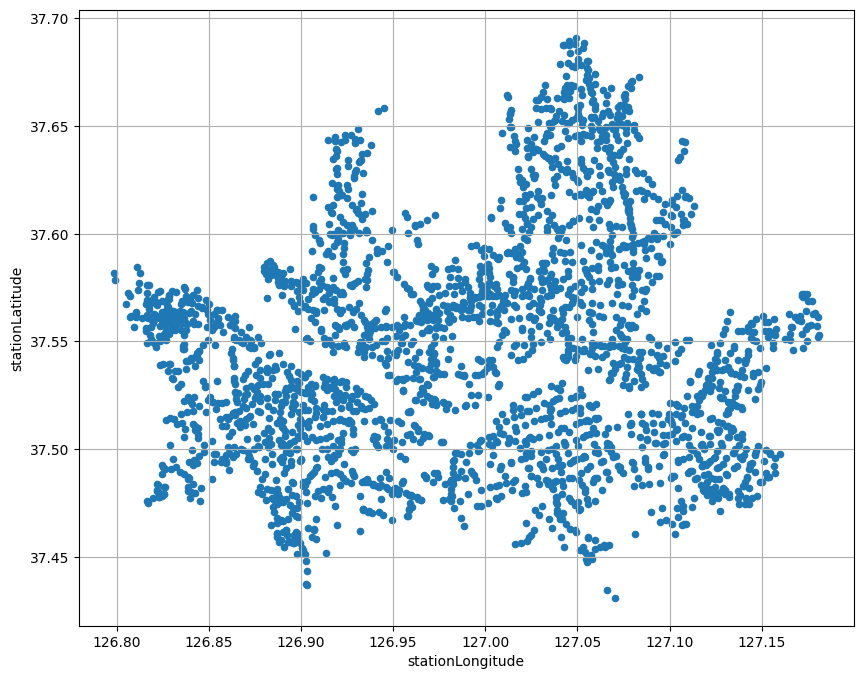

In [63]:
df_raw[['stationLongitude','stationLatitude']].plot.scatter(x='stationLongitude', y='stationLatitude', figsize=(10,8), grid=True)